In [2]:
# chickwts analysis


# libraries
import math 
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.base.model import Model




In [7]:
# import the data
chickwts = pd.read_csv('chickwts.csv')

## Read the dataset into a 
print(chickwts)

# type:
print(type(chickwts))



    weight       feed
0      179  horsebean
1      160  horsebean
2      136  horsebean
3      227  horsebean
4      217  horsebean
..     ...        ...
66     359     casein
67     216     casein
68     222     casein
69     283     casein
70     332     casein

[71 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [8]:
# Examine the data
chickwts.info()
chickwts.shape
chickwts.columns
chickwts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   weight  71 non-null     int64 
 1   feed    71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,weight
count,71.000000
mean,261.309859
std,78.073700
min,108.000000
25%,204.500000
50%,258.000000
75%,323.500000
max,423.000000


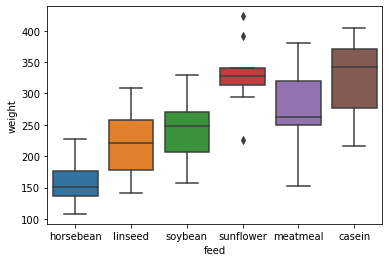

In [9]:

#%%
# explore first dataset rows
chickwts.head()


#%%
sns.boxplot(x='feed', y='weight', data=chickwts)

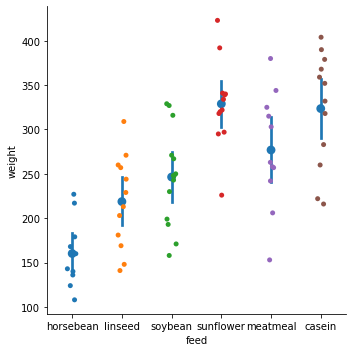

In [10]:

# Plot
sns.catplot(x="feed", y="weight", data=chickwts)

sns.pointplot(x="feed", y="weight", data=chickwts, join=False)
# alternatively:
# sns.catplot(x="feed", y="weight", data=chickwts, kind="point")



In [11]:
## T-rest
# fit a linear model
# specify model
model = ols("weight ~ feed", chickwts)


# fit model
results = model.fit()

# extract coefficients
results.params.Intercept


# Explore model results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     15.36
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           5.94e-10
Time:                        10:39:06   Log-Likelihood:                -381.94
No. Observations:                  71   AIC:                             775.9
Df Residuals:                      65   BIC:                             789.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           323.5833     15.834     20.436      0.000     291.961     355.206
feed[T.horsebean]  -163.3833     23.485     -6.957      0.000    -210.287    -116.480
feed[T.linseed]    -104.8333     22.393     -4.682      0.000    -149.554     -60.112
feed[T.meatmeal]    -46.6742     22.896     -2.039      0.046     -92.400      -0.948
feed[T.soybean]     -77.1548     21.578     -3.576      0.001    -120.249     -34.061
feed[T.sunflower]     5.3333     22.393      0.238      0.812     -39.388      50.054
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.103
Skew:                          -0.189   Prob(JB):                        0.576
Kurtosis:                       2.521   Cond. No.                         6.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# ANOVA
# compute anova
aov_table = sm.stats.anova_lm(results, typ=2)

# explore anova results
aov_table


chickwts.groupby(['feed']).describe()



# Produces Pandas DataFrame
chickwts.groupby('feed')[['weight']].mean()


chickwts.groupby(['feed']).agg({'weight':['mean','std']})

weight           
                 mean        std
feed                            
casein     323.583333  64.433840
horsebean  160.200000  38.625841
linseed    218.750000  52.235698
meatmeal   276.909091  64.900623
soybean    246.428571  54.129068
sunflower  328.916667  48.836384